In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
url = 'https://raw.githubusercontent.com/maa929/4105/main/Housing.csv'
housing = pd.DataFrame(pd.read_csv(url))
housing.isnull().sum()*100/housing.shape[0];
#housing.head()

In [330]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

In [331]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [332]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
x_train = df_train[num_vars].values[:, (1,2,3,4,5)]
x_test = df_test[num_vars].values[:, (1,2,3,4,5)]
y_train = df_train[num_vars].values[:, 0]
y_test = df_test[num_vars].values[:, 0]
#testing = df_test['price'].values
m_train = len(y_train)
m_test = len(y_test)
n_train = len(x_train)
n_test = len(x_test)
x0_train = np.ones((m_train, 1))
x0_test = np.ones((m_test, 1))
x1_train = x_train.reshape(m_train, 5)
x1_test = x_test.reshape(m_test, 5)
train_set = np.hstack((x0_train, x1_train))
test_set = np.hstack((x0_test, x1_test))
theta = np.zeros(6)
m = len(housing)

In [333]:
def compute_cost_train(X, y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [334]:
def gradient_descent(X, test_set, y, y_test, theta, alpha, iterations):
  m = len(y)  # Number of training examples
  cost_history_train = np.zeros(iterations)
  cost_history_test = np.zeros(iterations)

  for i in range(iterations):
      predictions = X.dot(theta)
      errors = np.subtract(predictions, y)
      sum_delta = (alpha / m) * X.transpose().dot(errors)
      theta -= sum_delta
      cost_history_train[i] = compute_cost_train(X, y, theta)
      cost_history_test[i] = compute_cost_train(test_set, y_test, theta)

  return theta, cost_history_train, cost_history_test

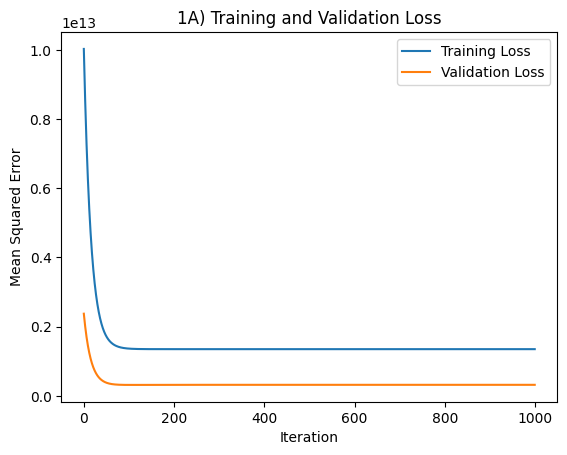

In [335]:
iterations = 1000
alpha = 0.000000001
theta, cost_history_train, cost_history_test = gradient_descent(train_set, test_set, y_train, y_test, theta, alpha, iterations)
plt.plot(cost_history_train, label = "Training Loss")
plt.plot(cost_history_test, label = "Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("1A) Training and Validation Loss")
plt.show()


In [336]:
vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x_train = df_train[vars].values[:, (1,2,3,4,5,6,7,8,9,10,11)]
x_test = df_test[vars].values[:, (1,2,3,4,5,6,7,8,9,10,11)]
y_train = df_train[vars].values[:, 0]
y_test = df_test[vars].values[:, 0]
m_train = len(y_train)
m_test = len(y_test)
n_train = len(x_train)
n_test = len(x_test)
x0_train = np.ones((m_train, 1))
x0_test = np.ones((m_test, 1))
x1_train = x_train.reshape(m_train, 11)
x1_test = x_test.reshape(m_test, 11)
train_set = np.hstack((x0_train, x1_train))
test_set = np.hstack((x0_test, x1_test))
theta = np.zeros(12)
m = len(housing)

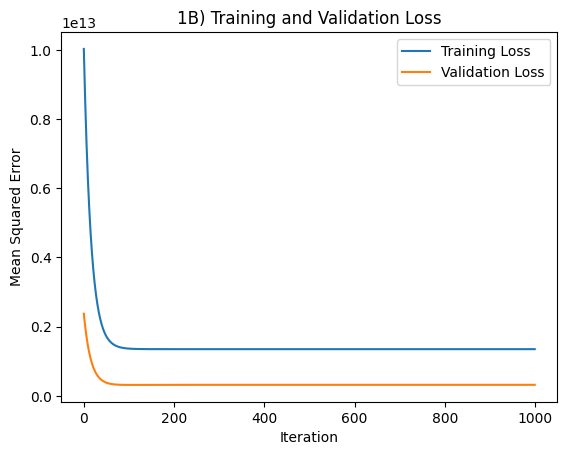

In [337]:
theta, cost_history_train, cost_history_test = gradient_descent(train_set, test_set, y_train, y_test, theta, alpha, iterations)
plt.plot(cost_history_train, label = "Training Loss")
plt.plot(cost_history_test, label = "Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("1B) Training and Validation Loss")
plt.show()

In [338]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler1 = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [339]:
x_train = df_train[num_vars].values[:, (0,1,2,3,4)]
x_test = df_test[num_vars].values[:, (0,1,2,3,4)]
y_train = df_train['price'].values
y_test = df_test['price'].values
#testing = df_test['price'].values
m_train = len(y_train)
m_test = len(y_test)
n_train = len(x_train)
n_test = len(x_test)
x0_train = np.ones((m_train, 1))
x0_test = np.ones((m_test, 1))
x1_train = x_train.reshape(m_train, 5)
x1_test = x_test.reshape(m_test, 5)
train_set = np.hstack((x0_train, x1_train))
test_set = np.hstack((x0_test, x1_test))
theta = np.zeros(6)
m = len(housing)

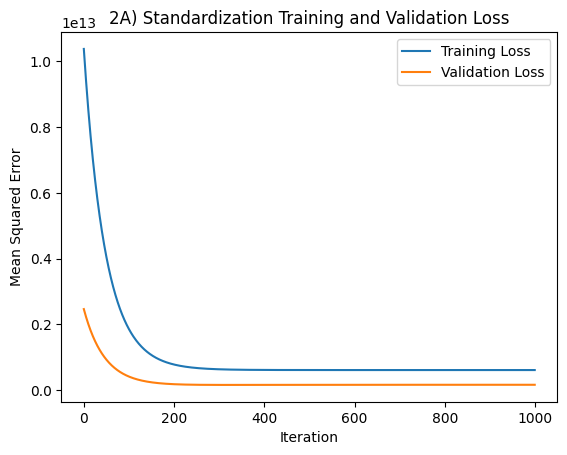

In [340]:
iterations = 1000
alpha = 0.01
theta, cost_history_train, cost_history_test = gradient_descent(train_set, test_set, y_train, y_test, theta, alpha, iterations)
plt.plot(cost_history_train, label = "Training Loss")
plt.plot(cost_history_test, label = "Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("2A) Standardization Training and Validation Loss")
plt.show()


In [341]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler1 = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [342]:
x_train = df_train[num_vars].values[:, (0,1,2,3,4)]
x_test = df_test[num_vars].values[:, (0,1,2,3,4)]
y_train = df_train['price'].values
y_test = df_test['price'].values
#testing = df_test['price'].values
m_train = len(y_train)
m_test = len(y_test)
n_train = len(x_train)
n_test = len(x_test)
x0_train = np.ones((m_train, 1))
x0_test = np.ones((m_test, 1))
x1_train = x_train.reshape(m_train, 5)
x1_test = x_test.reshape(m_test, 5)
train_set = np.hstack((x0_train, x1_train))
test_set = np.hstack((x0_test, x1_test))
theta = np.zeros(6)
m = len(housing)

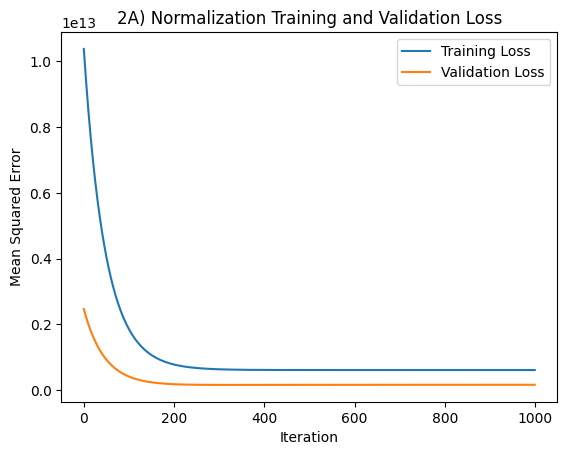

In [343]:
iterations = 1000
alpha = 0.01
theta, cost_history_train, cost_history_test = gradient_descent(train_set, test_set, y_train, y_test, theta, alpha, iterations)
plt.plot(cost_history_train, label = "Training Loss")
plt.plot(cost_history_test, label = "Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("2A) Normalization Training and Validation Loss")
plt.show()

In [344]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [345]:
vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x_train = df_train[vars].values[:, (1,2,3,4,5,6,7,8,9,10,11)]
x_test = df_test[vars].values[:, (1,2,3,4,5,6,7,8,9,10,11)]
y_train = df_train[vars].values[:, 0]
y_test = df_test[vars].values[:, 0]
m_train = len(y_train)
m_test = len(y_test)
n_train = len(x_train)
n_test = len(x_test)
x0_train = np.ones((m_train, 1))
x0_test = np.ones((m_test, 1))
x1_train = x_train.reshape(m_train, 11)
x1_test = x_test.reshape(m_test, 11)
train_set = np.hstack((x0_train, x1_train))
test_set = np.hstack((x0_test, x1_test))
theta = np.zeros(12)
m = len(housing)

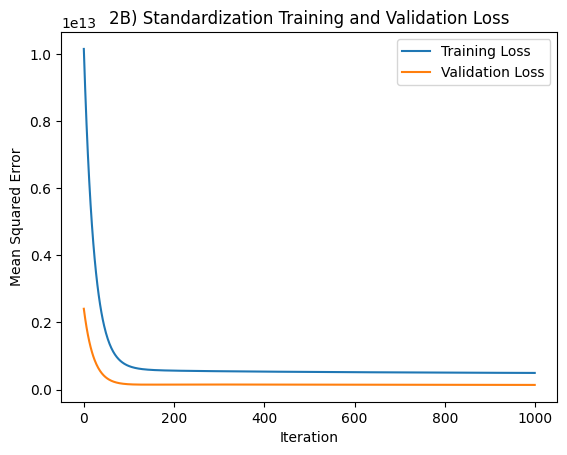

In [346]:
theta, cost_history_train, cost_history_test = gradient_descent(train_set, test_set, y_train, y_test, theta, alpha, iterations)
plt.plot(cost_history_train, label = "Training Loss")
plt.plot(cost_history_test, label = "Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("2B) Standardization Training and Validation Loss")
plt.show()

In [347]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [348]:
vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x_train = df_train[vars].values[:, (1,2,3,4,5,6,7,8,9,10,11)]
x_test = df_test[vars].values[:, (1,2,3,4,5,6,7,8,9,10,11)]
y_train = df_train[vars].values[:, 0]
y_test = df_test[vars].values[:, 0]
m_train = len(y_train)
m_test = len(y_test)
n_train = len(x_train)
n_test = len(x_test)
x0_train = np.ones((m_train, 1))
x0_test = np.ones((m_test, 1))
x1_train = x_train.reshape(m_train, 11)
x1_test = x_test.reshape(m_test, 11)
train_set = np.hstack((x0_train, x1_train))
test_set = np.hstack((x0_test, x1_test))
theta = np.zeros(12)
m = len(housing)

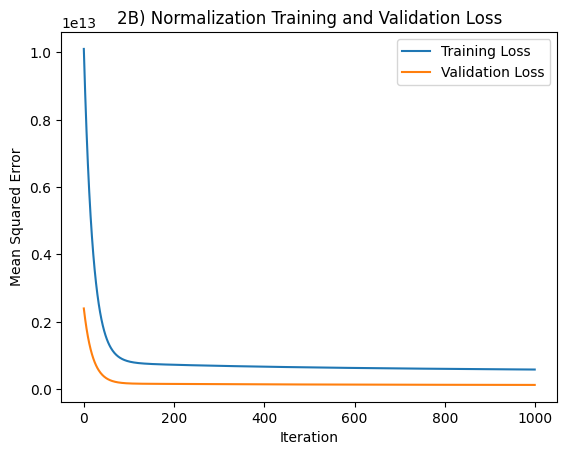

In [349]:
theta, cost_history_train, cost_history_test = gradient_descent(train_set, test_set, y_train, y_test, theta, alpha, iterations)
plt.plot(cost_history_train, label = "Training Loss")
plt.plot(cost_history_test, label = "Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("2B) Normalization Training and Validation Loss")
plt.show()

In [350]:
def gradient_descent2(X, test_set, y, y_test, theta, alpha, iterations):
  m = len(y)  # Number of training examples
  cost_history_train = np.zeros(iterations)
  cost_history_test = np.zeros(iterations)
  lambda_value = 0.01

  for i in range(iterations):
      predictions = X.dot(theta)
      errors = np.subtract(predictions, y)
      sum_delta = (alpha / m) * (X.transpose().dot(errors) + lambda_value * theta)  # Regularization term
      theta -= sum_delta
      cost_history_train[i] = compute_cost_train(X, y, theta) + (lambda_value / (2 * m)) * np.sum(theta**2)  # Regularization term to cost
      cost_history_test[i] = compute_cost_train(test_set, y_test, theta)

  return theta, cost_history_train, cost_history_test

In [351]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [352]:
x_train = df_train[num_vars].values[:, (0,1,2,3,4)]
x_test = df_test[num_vars].values[:, (0,1,2,3,4)]
y_train = df_train['price'].values
y_test = df_test['price'].values
#testing = df_test['price'].values
m_train = len(y_train)
m_test = len(y_test)
n_train = len(x_train)
n_test = len(x_test)
x0_train = np.ones((m_train, 1))
x0_test = np.ones((m_test, 1))
x1_train = x_train.reshape(m_train, 5)
x1_test = x_test.reshape(m_test, 5)
train_set = np.hstack((x0_train, x1_train))
test_set = np.hstack((x0_test, x1_test))
theta = np.zeros(6)
m = len(housing)

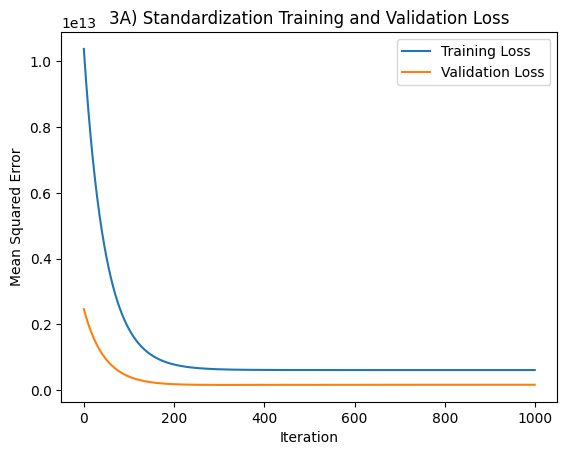

In [353]:
iterations = 1000
alpha = 0.01
theta, cost_history_train, cost_history_test = gradient_descent2(train_set, test_set, y_train, y_test, theta, alpha, iterations)
plt.plot(cost_history_train, label = "Training Loss")
plt.plot(cost_history_test, label = "Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("3A) Standardization Training and Validation Loss")
plt.show()

In [354]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [355]:
x_train = df_train[num_vars].values[:, (0,1,2,3,4)]
x_test = df_test[num_vars].values[:, (0,1,2,3,4)]
y_train = df_train['price'].values
y_test = df_test['price'].values
#testing = df_test['price'].values
m_train = len(y_train)
m_test = len(y_test)
n_train = len(x_train)
n_test = len(x_test)
x0_train = np.ones((m_train, 1))
x0_test = np.ones((m_test, 1))
x1_train = x_train.reshape(m_train, 5)
x1_test = x_test.reshape(m_test, 5)
train_set = np.hstack((x0_train, x1_train))
test_set = np.hstack((x0_test, x1_test))
theta = np.zeros(6)
m = len(housing)

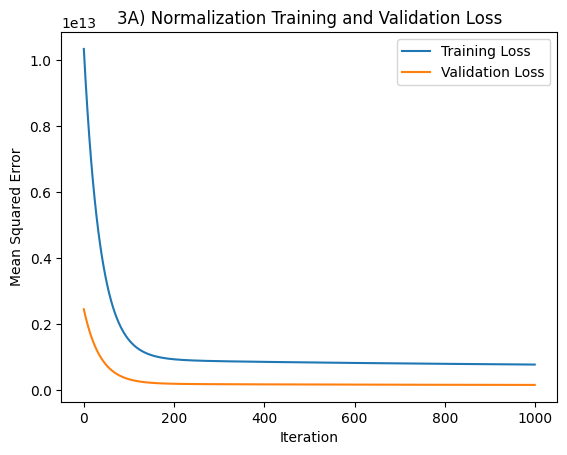

In [356]:
iterations = 1000
alpha = 0.01
theta, cost_history_train, cost_history_test = gradient_descent2(train_set, test_set, y_train, y_test, theta, alpha, iterations)
plt.plot(cost_history_train, label = "Training Loss")
plt.plot(cost_history_test, label = "Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("3A) Normalization Training and Validation Loss")
plt.show()

In [357]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [358]:
vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x_train = df_train[vars].values[:, (1,2,3,4,5,6,7,8,9,10,11)]
x_test = df_test[vars].values[:, (1,2,3,4,5,6,7,8,9,10,11)]
y_train = df_train[vars].values[:, 0]
y_test = df_test[vars].values[:, 0]
m_train = len(y_train)
m_test = len(y_test)
n_train = len(x_train)
n_test = len(x_test)
x0_train = np.ones((m_train, 1))
x0_test = np.ones((m_test, 1))
x1_train = x_train.reshape(m_train, 11)
x1_test = x_test.reshape(m_test, 11)
train_set = np.hstack((x0_train, x1_train))
test_set = np.hstack((x0_test, x1_test))
theta = np.zeros(12)
m = len(housing)

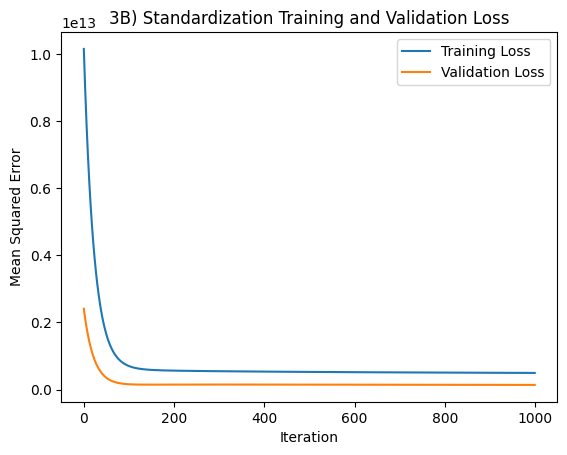

In [359]:
theta, cost_history_train, cost_history_test = gradient_descent2(train_set, test_set, y_train, y_test, theta, alpha, iterations)
plt.plot(cost_history_train, label = "Training Loss")
plt.plot(cost_history_test, label = "Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("3B) Standardization Training and Validation Loss")
plt.show()

In [360]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [361]:
vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x_train = df_train[vars].values[:, (1,2,3,4,5,6,7,8,9,10,11)]
x_test = df_test[vars].values[:, (1,2,3,4,5,6,7,8,9,10,11)]
y_train = df_train[vars].values[:, 0]
y_test = df_test[vars].values[:, 0]
m_train = len(y_train)
m_test = len(y_test)
n_train = len(x_train)
n_test = len(x_test)
x0_train = np.ones((m_train, 1))
x0_test = np.ones((m_test, 1))
x1_train = x_train.reshape(m_train, 11)
x1_test = x_test.reshape(m_test, 11)
train_set = np.hstack((x0_train, x1_train))
test_set = np.hstack((x0_test, x1_test))
theta = np.zeros(12)
m = len(housing)

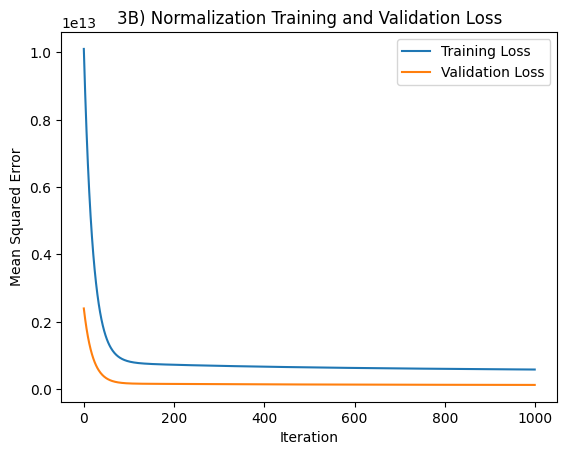

In [362]:
theta, cost_history_train, cost_history_test = gradient_descent2(train_set, test_set, y_train, y_test, theta, alpha, iterations)
plt.plot(cost_history_train, label = "Training Loss")
plt.plot(cost_history_test, label = "Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("3B) Normalization Training and Validation Loss")
plt.show()